In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Trajectoire simple

cas où $H=\frac{1}{2}X^{T}MX-r^{T}X+\frac{1}{2}S^{-1}M^{-1}S$

In [2]:
np.random.seed(43)

#paramètres au hasard
d=2
r=[5,9]
M=np.identity(d)
x0=np.zeros(d)
x0_point=np.random.multivariate_normal(np.zeros(d), np.linalg.inv(M))
print(x0_point)
t=0.896
t_max=np.pi
T=np.pi/2
pas=0.01
temps=np.arange(0, t_max, pas)

[ 0.25739993 -0.90848143]


In [3]:
def fct_a(x0_point):
    return x0_point

def fct_mu(M, r):
    mu=[0]*len(r)
    for i in range(len(r)):
        mu[i]=np.sum(np.linalg.inv(M)[i] * r)
    return mu

def fct_b(M, r, x0):
    return(x0-fct_mu(M,r))

print(fct_a(x0_point))
print(fct_mu(M, r))
print(fct_b(M, r, x0))

[ 0.25739993 -0.90848143]
[5.0, 9.0]
[-5. -9.]


In [4]:
 def position(M, r, x0, x0_point, t):
    d = len(x0)
    x = np.zeros(d)
    a = fct_a(x0_point)
    b = fct_b(M,r,x0)
    mu = fct_mu(M,r)
    x = mu + a * m.sin(t) + b * m.cos(t)
    return x

print(position(M, r, x0, x0_point, t))

[2.07729519 2.66798197]


In [5]:
def fct_trajectoire(M, r, x0, x0_point, temps):
    n=len(temps)
    trajectoire=[x0]*n
    for i in range(n) :
        trajectoire[i]=position(M,r,x0,x0_point, temps[i]).tolist()
    return(trajectoire)

print(fct_trajectoire(M, r, x0, x0_point, temps))

[[0.0, 0.0], [0.0028239542703474285, -0.008634666664979918], [0.00614762198096841, -0.01636847737046132], [0.009970670767860845, -0.023200658741822977], [0.014292718329333987, -0.029130527566620046], [0.019113332464231192, -0.03415749086290987], [0.024432031115156683, -0.03828104593855208], [0.030248282416678762, -0.04150078044147598], [0.036561504748512164, -0.04381637240091685], [0.04337106679368574, -0.04522759025960532], [0.050676287601669756, -0.04573429289693287], [0.05847643665647162, -0.045336429643056064], [0.06677073394968502, -0.044034040283969844], [0.07555835005849243, -0.04182725505752671], [0.08483840622860672, -0.03871629464040538], [0.09460997446214403, -0.03470147012606262], [0.10487207761042239, -0.02978318299359728], [0.11562368947168089, -0.023961925067629508], [0.12686373489369185, -0.017238278469095647], [0.138591089881281, -0.009612915557056567], [0.15080458170872113, -0.0010865988614483513], [0.16350298903700722, 0.008339818993167825], [0.176685042035988, 0.018

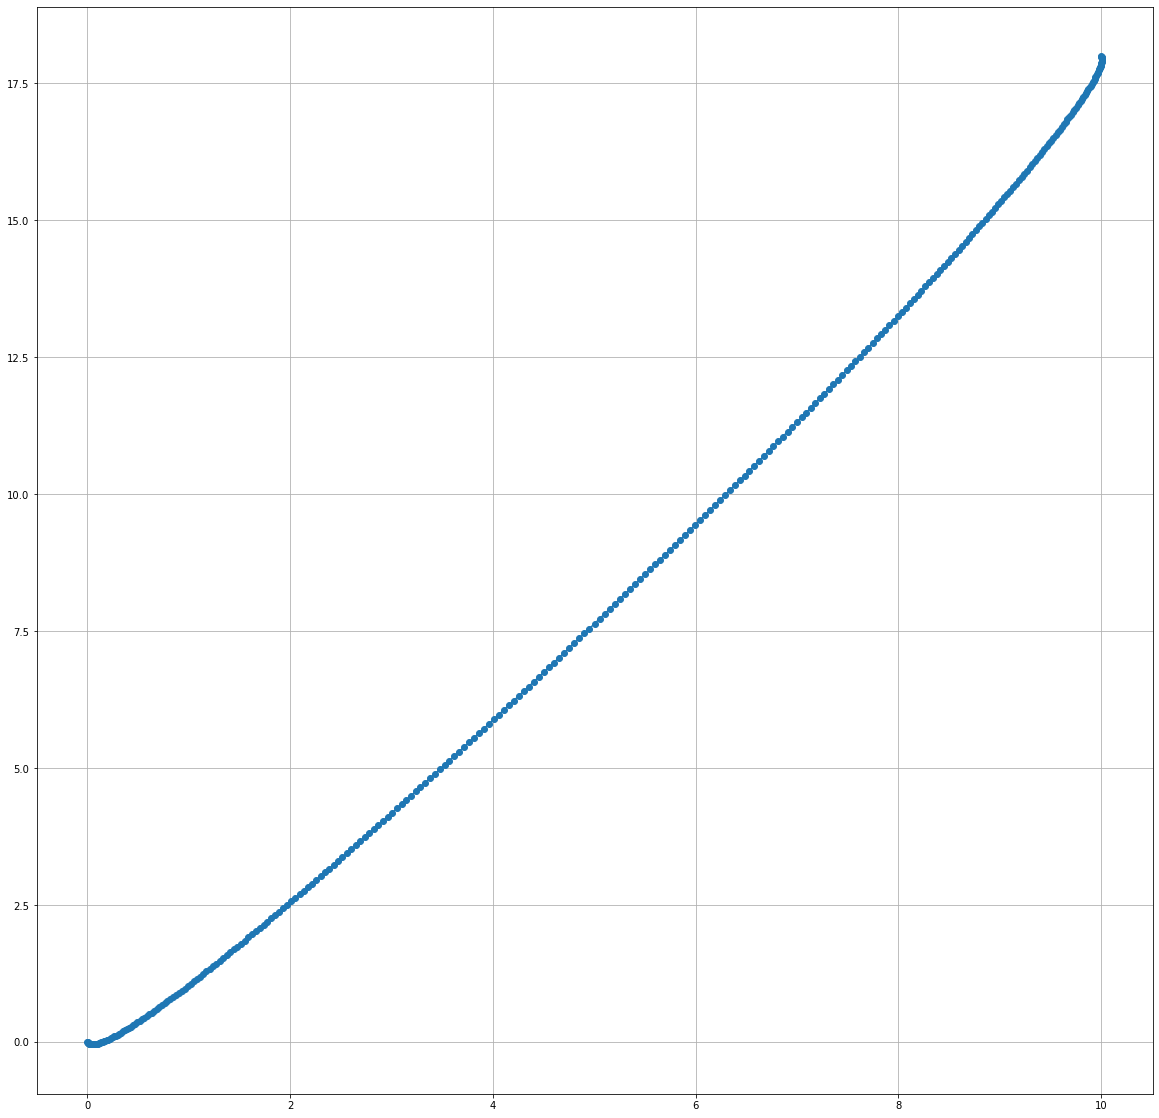

In [6]:
def plot_trajectory_2D(trajectoire):
    plt.figure(figsize=(20, 20))
    x1=[]
    for position in trajectoire:
        x1.append(position[0])
    x2=[]
    for position in trajectoire:
        x2.append(position[1])
    plt.plot(x1, x2, marker='o', linestyle='-')
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    plt.show()
    
plot_trajectory_2D(fct_trajectoire(M, r, x0, x0_point, temps))


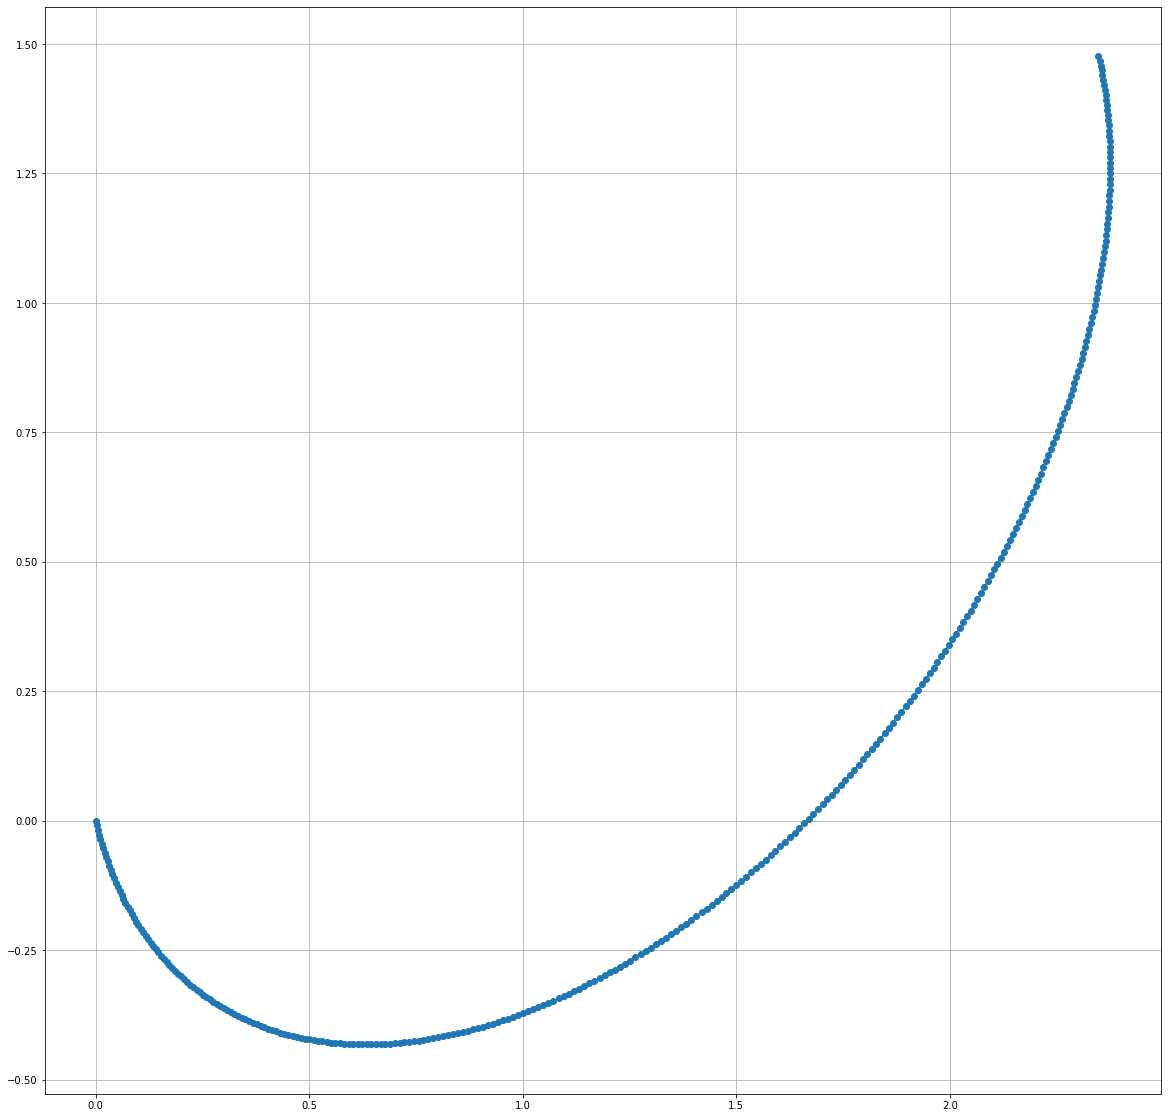

In [7]:
traj2=fct_trajectoire([[3, 2],[2, 9]], r, x0, x0_point, temps)
plot_trajectory_2D(traj2)

We have the trajectory of a particule following
$$
x_i(t)=\mu_i+a_i \sin (t)+b_i \cos (t),
$$
where
$$
\begin{aligned}
\mu_i & =\sum_{j=1}^d M_{i j}^{-1} r_j \\
a_i & =\dot{x}_i(0)=\sum_{j=1}^d M_{i j}^{-1} s_j(0), \\
b_i & =x_i(0)-\mu_i
\end{aligned}
$$

Now we want it with reflexion when hitting a constraint.

fictive linear constraint

In [8]:
# Contrainte

In [85]:
F=np.array([ [-1,0],[0, -1]])
print(F[:,0])
g=[ 5, 5]

[-1  0]


In [67]:
def tracer_contraintes(F,g,x0):
    # tracer les contraintes en dim 2
    xmin = -10
    xmax = 12
    #vecteur x naifs
    x = np.linspace(xmin, xmax, 100)

    d=len(g)
    for i in range(d):
        a,b=F[i][0],F[i][1]
        if a==0:
            plt.axvline(g[i], color='blue', lw=2)
        elif b==0:
            plt.axhline(g[i], color='green', lw=2)
        else :
            plt.plot(x, (g[i]-a*x)/b, color='red')

    #plot le point initial (permet de voir dans quelle partie du graph on évolut)
    plt.scatter(x0[0], x0[1], color="black", lw=2)
    # Show the graph
    plt.show()

tracer_contraintes(F,g,x0)

[[0.0, 0.0], [0.0028239542703474285, -0.008634666664979918], [0.00614762198096841, -0.01636847737046132], [0.009970670767860845, -0.023200658741822977], [0.014292718329333987, -0.029130527566620046], [0.019113332464231192, -0.03415749086290987], [0.024432031115156683, -0.03828104593855208], [0.030248282416678762, -0.04150078044147598], [0.036561504748512164, -0.04381637240091685], [0.04337106679368574, -0.04522759025960532], [0.050676287601669756, -0.04573429289693287], [0.05847643665647162, -0.045336429643056064], [0.06677073394968502, -0.044034040283969844], [0.07555835005849243, -0.04182725505752671], [0.08483840622860672, -0.03871629464040538], [0.09460997446214403, -0.03470147012606262], [0.10487207761042239, -0.02978318299359728], [0.11562368947168089, -0.023961925067629508], [0.12686373489369185, -0.017238278469095647], [0.138591089881281, -0.009612915557056567], [0.15080458170872113, -0.0010865988614483513], [0.16350298903700722, 0.008339818993167825], [0.176685042035988, 0.018

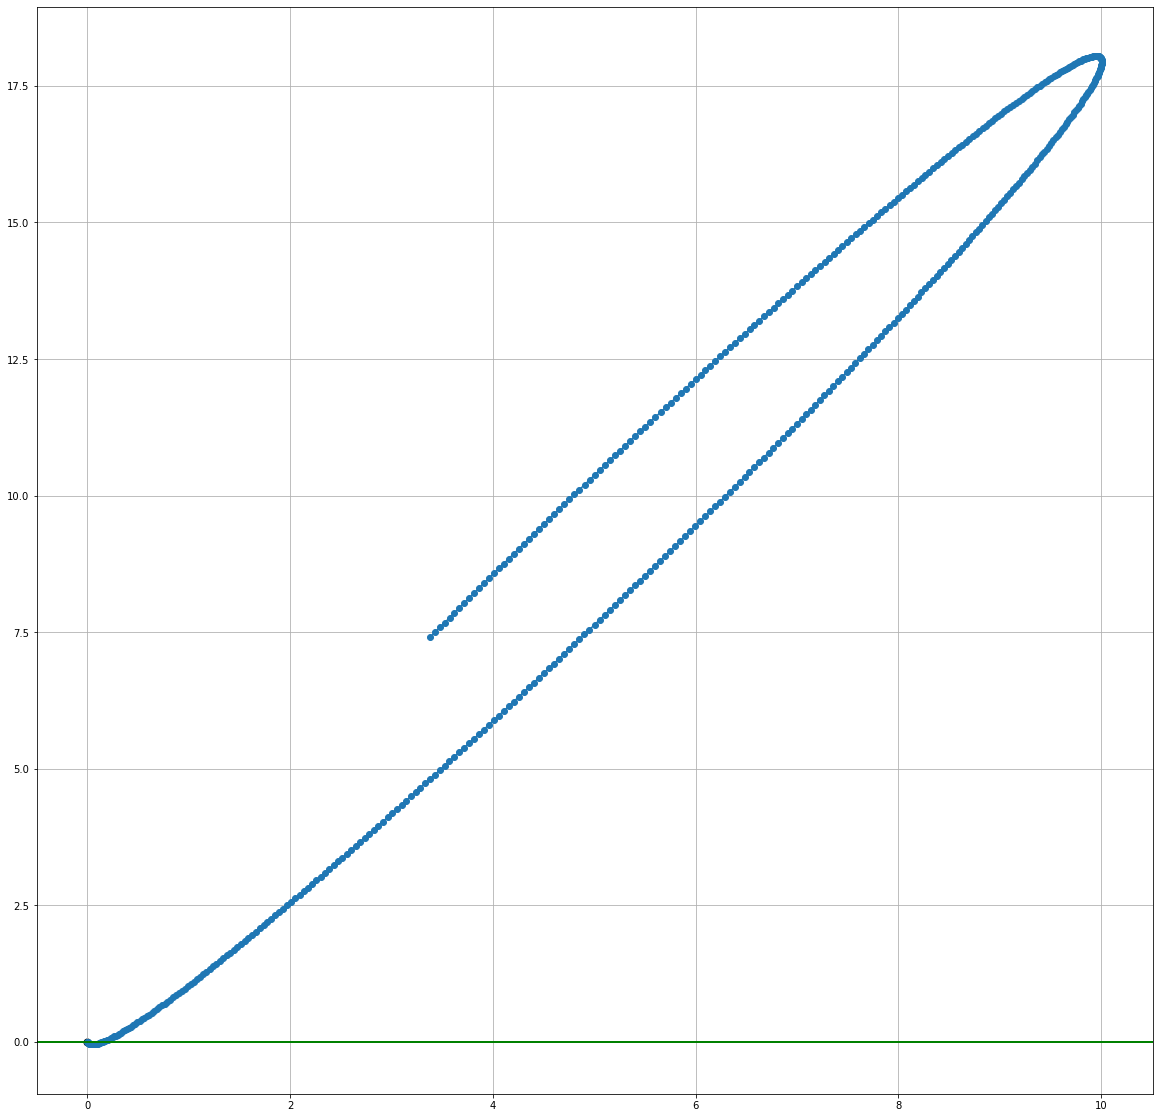

In [58]:
def plot_trajectory_2D_and_constraintes(M, r, x0, x0_point, temps, F, g):
    trajectoire=fct_trajectoire(M, r, x0, x0_point, temps)
    print(trajectoire)
    plt.figure(figsize=(20, 20))
    x1=[]
    for position in trajectoire:
        x1.append(position[0])
    x2=[]
    for position in trajectoire:
        x2.append(position[1])
    plt.plot(x1, x2, marker='o', linestyle='-')
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)
    # tracer les contraintes en dim 2
    xmin = -10
    xmax = 12
    #vecteur x naifs
    x = np.linspace(xmin, xmax, 100)

    d=len(g)
    for i in range(d):
        a,b=F[i][0],F[i][1]
        if a==0:
            plt.axvline(g[i], color='blue', lw=2)
        elif b==0:
            plt.axhline(g[i], color='green', lw=2)
        else :
            plt.plot(x, (g[i]-a*x)/b, color='red')

    #plot le point initial (permet de voir dans quelle partie du graph on évolut)
    plt.scatter(x0[0], x0[1], color="black", lw=2)
    # Show the graph
    plt.show()

plot_trajectory_2D_and_constraintes(M, r, x0, x0_point, temps, F, g)

In [86]:
def toucher_contrainte(F, g, M, r, x0, x0_point):
    m=len(g)
    a,b,mu=fct_a(x0_point),fct_b(M,r,x0), np.array(fct_mu(M, r))
    touche_mur = np.zeros(m)
    for j in range(m):
        print(F[:,j])
        print(a)
        print(sum(F[:,j]*a)**2)
        u_j = np.sqrt(sum(F[:,j]*a) ** 2 + sum(F[:,j]*b) ** 2)
        print(u_j)
        phi_j =np.arctan( -sum(F[:,j]*a) / sum(F[:,j]*b))
        if (-1)<=-sum(F[:,j]*mu)-g[j]/u_j<1:
            touche_mur[j]=np.arccos(-sum(F[:,j]*mu)-g[j]/u_j)-phi_j
        else :
            touche_mur[j]=np.inf
    return touche_mur.tolist()

print(toucher_contrainte(F, g, M, r, x0, x0_point))

[-1  0]
[ 0.25739993 -0.90848143]
0.06625472156745371
5.00662108827575
[ 0 -1]
[ 0.25739993 -0.90848143]
0.8253385137072028
9.045735929912349
[inf, inf]


[-1  0]
[ 0.25739993 -0.90848143]
0.06625472156745371
5.00662108827575
[ 0 -1]
[ 0.25739993 -0.90848143]
0.8253385137072028
9.045735929912349
inf
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1

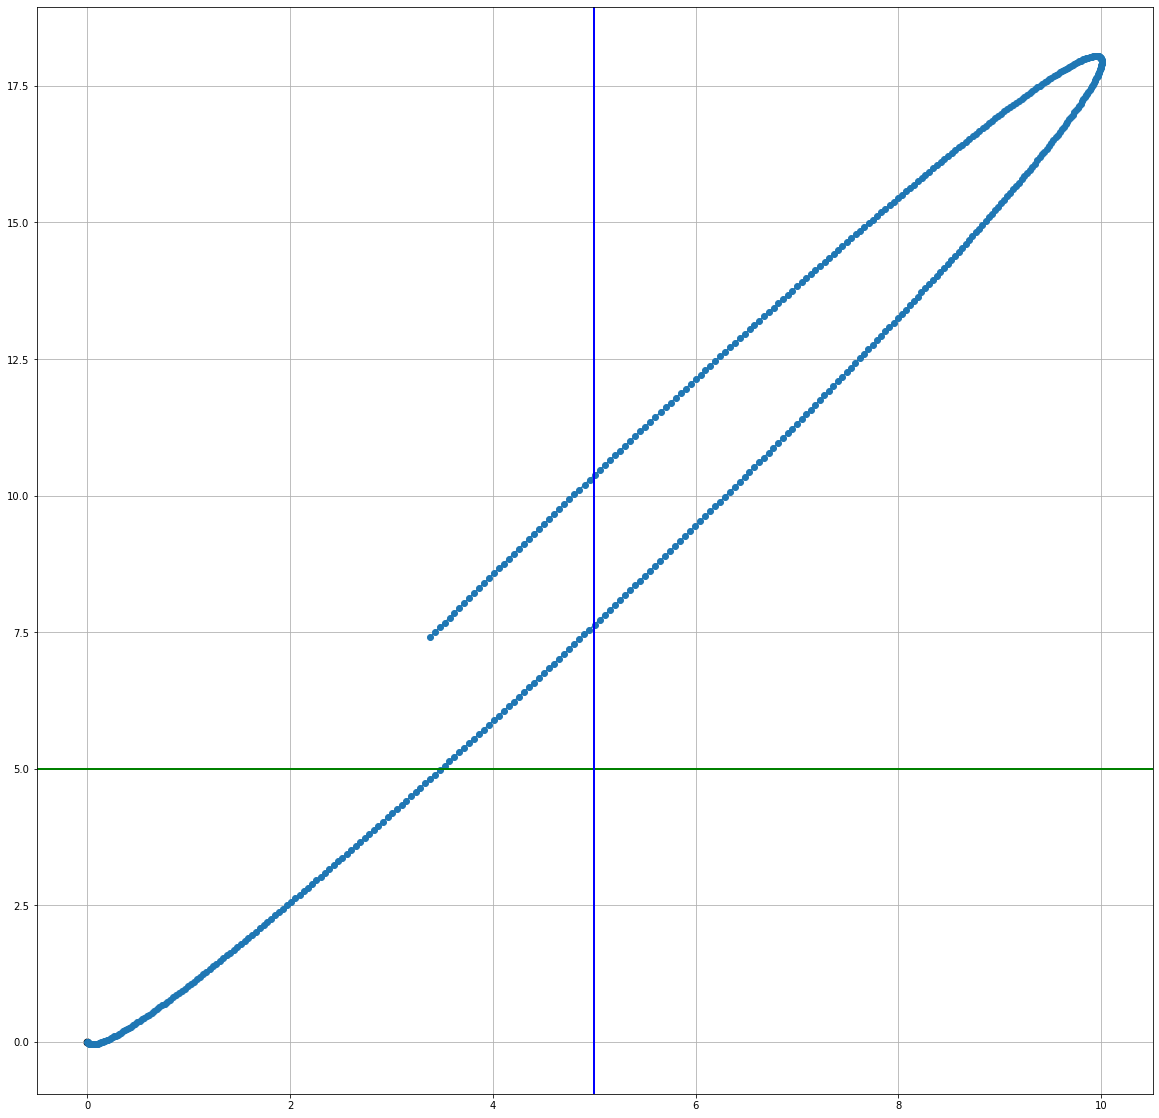

In [87]:
toucher=toucher_contrainte(F, g, M, r, x0, x0_point)
print(min(toucher))
temps2=np.arange(0, min(min(toucher),t_max), pas)
print(temps2)
plot_trajectory_2D_and_constraintes(M, r, x0, x0_point, temps2, F, g)

In [8]:
def temps_atteinte_x_point_reflexion(F, g, M, r, x0, x0_point):
    temps_contrainte=toucher_contrainte(F, g, M, r, x0, x0_point)
    t_h, h= min(temps_contrainte), temps_contrainte.index(min(temps_contrainte))
    def alpha_xpoint(F, M, r, x0, x0_point, t_h):
        a,b=fct_a(x0_point),fct_b(M,r,x0)
        x_point_t_h=a*m.cos(t_h)-b*m.sin(t_h)
        F2=np.linalg.norm(F[h])**2
        return (np.dot(F[h], x_point_t_h)/F2, x_point_t_h)
    alpha, x_point_t_h=alpha_xpoint(F, M, r, x0, x0_point, t)
    x_point_R=x_point_t_h-2*alpha*np.array(F[h])
    return (t_h, x_point_R)

print(temps_atteinte_x_point_reflexion(F, g, M, r, x0, x0_point))

NameError: name 'F' is not defined

In [15]:
def trajectoire_avec_reflexion(F, g, M, r, x0, x0_point, T, pas):
    temps_atteinte=[0]
    vitesse=[np.array(x0_point)]
    depart=[np.array(x0)]
    traj= []
    t=0
    while temps_atteinte[-1]<T:
        t, vit = temps_atteinte_x_point_reflexion(F, g, M, r, depart[-1], vitesse[-1])
        temps_atteinte.append(temps_atteinte[-1]+t)
        vitesse.append(np.array(vit))
        temps=np.arange(temps_atteinte[-2], temps_atteinte[-1], pas)
        traj+=trajectoire(M, r, depart[-1], vit, temps)
        plot_trajectory_2D(traj)
        depart.append(np.array(traj[-1]))
    temps_atteinte[-1]=T
    return traj

print(trajectoire_avec_reflexion(F, g, M, r, x0, x0_point, T, pas))
plot_trajectory_2D(trajectoire_avec_reflexion(F, g, M, r, x0, x0_point, T, pas))

NameError: name 'trajectoire' is not defined

In [ ]:
toucher_contrainte(F, g, M, r, np.array([  6.00709935, -2.98744066]), np.array([  0.48543106, -2.97234987]))

In [ ]:
def x_position_apres_mur(F, M, r, x0, x0_point, t):
    t_h, h=premier_temps_mur(F, g, M, r, x0, x0_point)['t'], premier_temps_mur(F, g, M, r, x0, x0_point)['indice contrainte']
    def alpha_xpoint(F, M, r, x0, x0_point, t):
        position=position_simple(M, r, x0, x0_point, t)
        a,b=position['a, b']
        x_point_t_h=a*cos(t_h)-b*sin(t_h)
        F2=numpy.linalg.norm(F[h])**2
        return (np.dot(F[h], x_point_t_h)/F2, x_point_t_h)
    alpha, xpoint_t_h=alpha_xpoint(F, M, r, x0, x0_point, t)
    x_point_R=x_point_t_h-2*alpha*F[h]
    return position_simple(M, r, x0, x_point_R, t)

In [ ]:
def trajectoire(F, g, M, r, x0, x0_point, T, pas):
    def x_point_r(F, g, M, r, x0, x0_point,t , pas):
        t_h, h=premier_temps_mur(F, g, M, r, x0, x0_point)['t'], premier_temps_mur(F, g, M, r, x0, x0_point)['indice contrainte']
        def alpha_xpoint(F, M, r, x0, x0_point, t):
            position=position_simple(M, r, x0, x0_point, t)
            a,b=position['a, b']
            x_point_t_h=a*m.cos(t_h)-b*m.sin(t_h)
            F2=np.linalg.norm(F[h])**2
            return (np.dot(F[h], x_point_t_h)/F2, x_point_t_h)
        alpha, x_point_t_h=alpha_xpoint(F, M, r, x0, x0_point, t)
        x_point_R=x_point_t_h-2*alpha*np.array(F[h])
        return(x_point_R)
    temps = np.arange(0, T, pas)
    n=len(temps)
    trajectoire=[[x0]]
    x_point=x0_point
    i=0
    t_mur=premier_temps_mur(F, g, M, r, x0, x0_point)['t']
    t_min=temps[0]
    for t in temps :
        print('for')
        print(t_min)
        print(t)
        print(t_mur)
        print(t_min<=t<=t_mur)
        if (t_min<=t<=t_mur) :
            print('if')
            trajectoire.append(position_simple(M, r, x0, x_point, t)['position'])
        t_min=t_mur
        x0=trajectoire[len(trajectoire)-1]
        x_point=x_point_r(F, g, M, r, x0, x0_point, t_min, pas)
        print('mur')
        print(se_prendre_un_mur(F, g, M, r, x0, x_point))
        t_mur=temps_mur(F, g, M, r, x0, x_point)['t']
    return trajectoire

In [ ]:
T=3
pas=0.1
traj=trajectoire(F, g, M, r, x0, x0_point, T, pas)

In [ ]:
plot_trajectory(traj)